# January 2016 g-2 Development Survey

The survey may be found at http://goo.gl/forms/P0vN4tdj7P. 

Here are the questions:

**Question 1 (choose one):**

I'm a(n)...
* current g-2 code developer
* future g-2 code developer
* interested non-developer
* I'd rather not say

**Question 2 (choose one):**

Should we adopt a CMS style of code organization using one git repository, git sparse checkout, and GitHub (please read GM2-doc-3440 first http://gm2-docdb.fnal.gov:8080/cgi-bin/ShowDocument?docid=3440 )? 

* Heck yes, I strongly agree
* Yes, I mildly agree
* Meh, I understand the issue but I'm neutral
* No, I mildly disagree
* Heck no, I strongly disagree
* I've read GM2-doc-3440 and I need more information before answering
* Sorry, I'm not going to read GM2-doc-3440

**Question 3 (choose all that apply):**

Do you want to develop gm2 code on your laptop? How? (select all that apply to you). Note that Centos6 is compatible with Scientific Linux 6, so our code runs on that OS already. 

* I have an SLF6/CENTOS6 laptop and I can run CVMFS
* I have a Mac laptop and I want to do gm2 development natively under OSX El Capitan (this would require an El Capitan build of gm2 software and art AND requires you to permanently turn off a new feature called "System Integrity Protection" https://en.wikipedia.org/wiki/System_Integrity_Protection )
* I have a Mac laptop and I'm willing to do gm2 development in a easy to set up CENTOS6 Virtual Machine running my laptop
* I have an Ubuntu laptop and I want to do gm2 development natively (this would require an Ubuntu build of gm2 code and art)
* I have an Ubuntu laptop and I'm willing to do gm2 development in an easy to set up CENTOS6 Virtual Machine or Docker container running on my laptop
* I have a Windows laptop and I'm willing to do gm2 development in an easy to set up CENTOS6 Virtual Machine running on my laptop
* I do not plan to do gm2 development on my laptop or I don't have a laptop (I'll use gm2gpvm or my home institution cluster)
* Something else (fill in comments below)
* What's a virtual machine?


Get set up

In [139]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

Load responses (downloaded from Google sheets)

In [140]:
r = pd.read_csv("responses.csv")

Let's rekey the columns and results to make them easier to deal with...

In [141]:
r.columns = ['Timestamp', 'AdoptCMSStyle', 'Laptop', 'Comments', 'User' ]

In [142]:
replacements = {'AdoptCMSStyle':
                   {'Heck yes, I strongly agree': 'Strong yes',
                    'Yes, I mildly agree': 'Yes',
                    "Meh, I understand the issue but I'm neutral": 'Neutral',
                    "No, I mildly disagree": 'No',
                    "Heck No, I strongly disagree": 'Strong no',
                    "I've read GM2-doc-3440 and I need more information before answering": '??',
                    "Sorry, I'm not going to read GM2-doc-3440": 'Abstain'},
                'User':
                   {"current g-2 code developer": "current",
                    "future g-2 code developer": 'future',
                    "interested non-developer" : 'non',
                    "I'd rather not say": "anonymous"}}
r.replace(replacements, inplace=True)
r.head()

,Timestamp,AdoptCMSStyle,Laptop,Comments,User
0,1/21/2016 17:27:14,Strong yes,I have a Mac laptop and I want to do gm2 devel...,NaN,current
1,1/21/2016 17:27:28,No,I have a Mac laptop and I want to do gm2 devel...,NaN,current
2,1/21/2016 17:28:05,Abstain,I have a Mac laptop and I want to do gm2 devel...,NaN,future
3,1/21/2016 17:29:00,Yes,I do not plan to do gm2 development on my lapt...,Just make it easy for people to participate in...,non
4,1/21/2016 11:34:45,Yes,I do not plan to do gm2 development on my lapt...,NaN,current


## Demographics (what kind of developer)

How many total responses?

In [224]:
len(r)

26

Current developer? Future developer? Non-developer? Didn't say (anonynmous)?

In [222]:
r["User"].value_counts()

current      15
future        5
non           5
anonymous     1
Name: User, dtype: int64

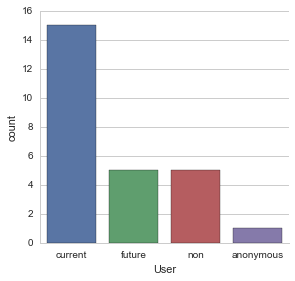

In [144]:
sns.factorplot("User", data=r, kind="count")

By percentage?

In [145]:
( r.User.value_counts(normalize=True)*100 ).round(1)

current      57.7
future       19.2
non          19.2
anonymous     3.8
Name: User, dtype: float64

## Should g-2 adopt the CMS style code organization?

Strong yes? Yes? Neutral? No? Strong no? Don't understand (??), Abstain?


In [146]:
r.AdoptCMSStyle.value_counts()

Yes           10
Strong yes     9
Abstain        3
Neutral        2
No             1
??             1
Name: AdoptCMSStyle, dtype: int64

Separate out responses by developer type...

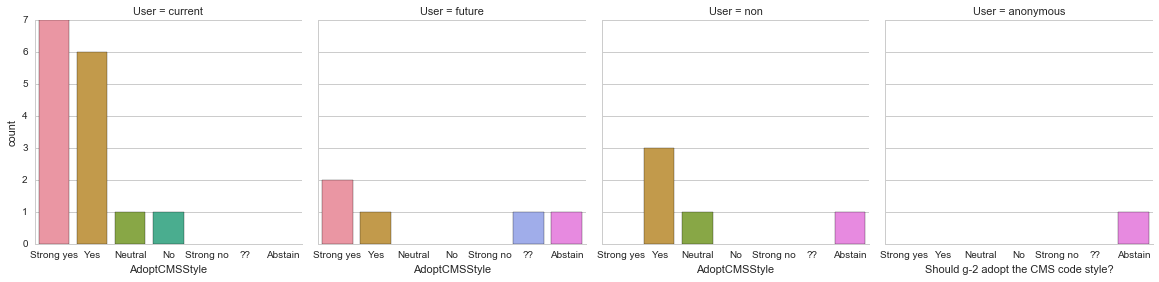

In [147]:
sns.factorplot("AdoptCMSStyle", data=r, kind="count", col="User",
               order=["Strong yes", "Yes", "Neutral", "No", "Strong no", "??", "Abstain"])   
plt.xlabel("Should g-2 adopt the CMS code style?")

There seems to be a clear mandate to go to the CMS style of code organization

## Laptop usage

The question here asks how people are willing to use their laptop for development and what new platforms the *art* team should consider. Right now, art and g-2 code runs on Scientific Linux 6 (SLF6, same as Centos 6) and Mac OSX Yosemite. The question of running a virtual machine or docker container with Centos 6 on the laptop is asked as well. 

Make the responses shorter... 

In [163]:
pd.set_option('display.width', 100)
for i, e in enumerate(r.Laptop):
    e = e.replace('I have a Mac laptop and I want to do gm2 development natively under OSX El Capitan (this would require an El Capitan build of gm2 software and art AND requires you to permanently turn off a new feature called "System Integrity Protection" https://en.wikipedia.org/wiki/System_Integrity_Protection )',
              'Mac-Native-El-Capitan')
    e = e.replace("I have a Mac laptop and I'm willing to do gm2 development in a easy to set up CENTOS6 Virtual Machine running my laptop",
                   "Mac-VM-Centos6")
    e = e.replace("I have an Ubuntu laptop and I want to do gm2 development natively (this would require an Ubuntu build of gm2 code and art)",
                   "Ubuntu-Native")
    e = e.replace("I have an Ubuntu laptop and I'm willing to do gm2 development in an easy to set up CENTOS6 Virtual Machine or Docker container running on my laptop",
                   "Ubuntu-VM-Centos6")
    e = e.replace("I have a Windows laptop and I'm willing to do gm2 development in an easy to set up CENTOS6 Virtual Machine running on my laptop",
                   "Windows-VM-Centos6")
    e = e.replace("I do not plan to do gm2 development on my laptop or I don't have a laptop  (I'll use gm2gpvm or my home institution cluster)",
                   "No Laptop/Home Cluster")
    e = e.replace("Something else (fill in comments below)", "Something else")
    e = e.replace("I have an SLF6/CENTOS6 laptop and I can run CVMFS", "Centos6-Native")
    r.Laptop[i] = e

Overall responses...

In [190]:
r.Laptop.value_counts()

No Laptop/Home Cluster                                           9
Mac-Native-El-Capitan, Mac-VM-Centos6                            8
Centos6-Native                                                   2
Mac-Native-El-Capitan                                            2
Ubuntu-Native                                                    1
Ubuntu-Native, Ubuntu-VM-Centos6, Something else                 1
Windows-VM-Centos6                                               1
Mac-VM-Centos6                                                   1
Mac-Native-El-Capitan, Mac-VM-Centos6, No Laptop/Home Cluster    1
Name: Laptop, dtype: int64

Plot everyone...

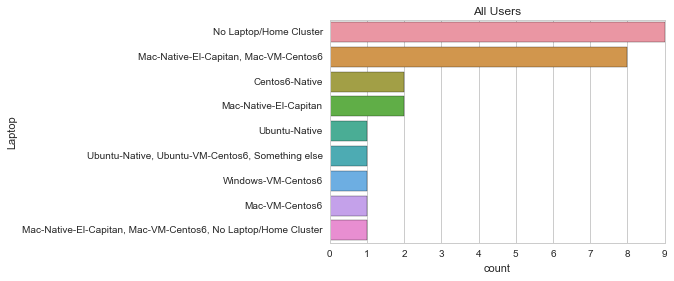

In [201]:
sns.countplot(y="Laptop", order=r.Laptop.value_counts().index, data=r)
plt.title("All Users")

Here are the responses from current developers...

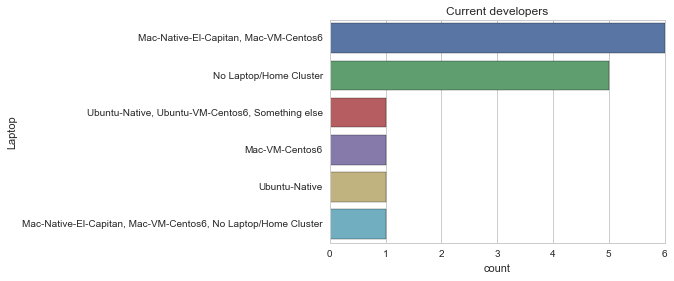

In [225]:
ru = r[r["User"] == "current"]
sns.countplot(y="Laptop", order=ru.Laptop.value_counts().index, data=ru)
plt.title("Current developers")

And for future developers...

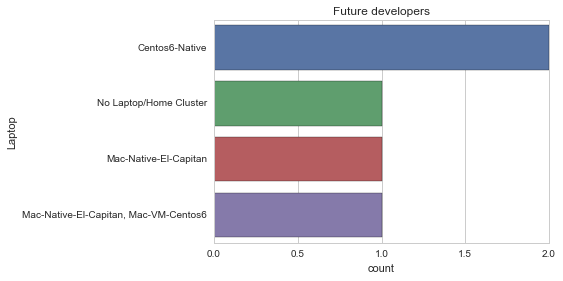

In [226]:
rf = r[r["User"] == "future"]
sns.countplot(y="Laptop", order=rf.Laptop.value_counts().index, data=rf)
plt.title("Future developers")

Interesting points for **current** developers:
* For current developers, 6 of 15 people are running a Mac and all of them are willing to run a VM!
* Many current developers, 5 of 15, aren't using a laptop for development.
* Two people want Ubuntu

For **Future** developers;
* 2 have a Centos6 (probably really Fedora) laptop



## Comments 

Let's look at the comments from users (there aren't that many). But this will be a little ugly

In [219]:
from IPython.display import display
c = r[r.Comments.str.len() > 0]["Comments"]
for row in c:
    display(row)

'Just make it easy for people to participate in, to learn if they join later, and to feel good about "looking back"  -dave-\nWhat we do here is what we want to do for Offline, where there will be MANY people doing what you now call "develop" and that code will be highly dynamic'

'Please,  include Ubuntu LTS as an official supported OS for g-2 development. '

'Being a "future developer" it would be easier for me to adopt the "new system" than it would be for folks that are used to the "old system".'

"My current system is an Ubuntu laptop with an SLF6 virtual machine that I maintain myself with both the online and offline dependencies (including CVMFS). We also make a virtual machine with tracker dependencies available for all on redmine, although it has fallen out of date and I don't think is used by many."

'I have Fedora on my laptop, but have a Centos6 virtual machine and I consider having a docker instance of Centos6 as well for gm2 SW if that could be feasible.'

"Being able to do development on a (mac) laptop was nice, but I don't think it is really a viable option going forward. Even if the El Capitan issue is somehow resolved, are we going to be in the exact same position with the next OS X release? The CMS-style git sounds very promising. Most of the real work, however, seems to be on the build-system side. "